# Peer-graded Assignment: Центральная предельная теорема своими руками

Загрузим библиотеки

In [239]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib inline

Установим общий размер и стиль для графиков

In [244]:
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8,6)

Я выбрал непрерывное распределение [Рэлея](https://en.wikipedia.org/wiki/Rayleigh_distribution).
Оно является частным случаем распределения Хи-квадрат при df == 2


Посмотрим на выбранное мной распределение. Для этого построим функцию распределения и функцию плотности вероястности. Сравним это с функциями, построенными по эмпирическим данным.

Для этого сгенерируем 1000 значений из данного распределения, при этом в качестве scale передадим 1

In [521]:
rayleigh = sts.rayleigh(scale = 1)
sample = rayleigh.rvs(1000)
# x_ppf = np.linspace(rayleigh.ppf(0.001), rayleigh.ppf(0.999), 1000)
x = np.linspace(-0.1, 3, 1000)

### Функция распределения

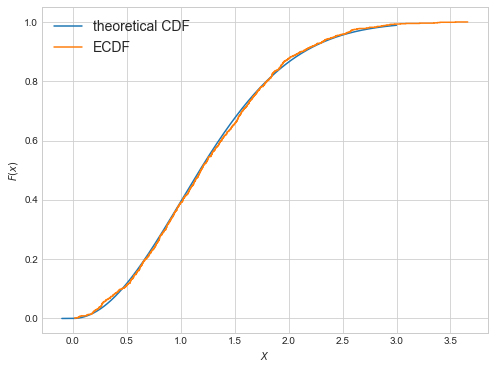

In [522]:
cdf = rayleigh.cdf(x)

ecdf = ECDF(sample)
plt.plot(x, cdf, label = "theoretical CDF")
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.xlabel("$X$")
plt.ylabel("$F(x)$")
plt.legend(prop={'size': 14})

### Функция плотности вероятности

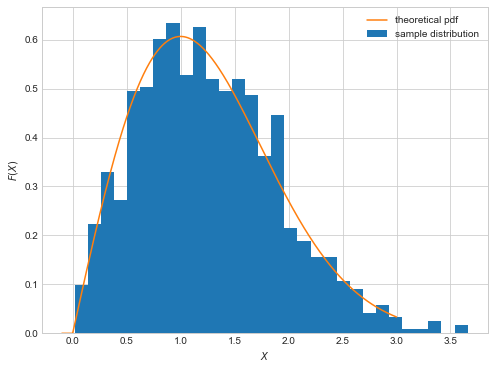

In [524]:
pdf = rayleigh.pdf(x)

plt.hist(sample, density = True, bins = 30, label = "sample distribution")
plt.plot(x, pdf, label = "theoretical pdf")

plt.xlabel("$X$")
plt.ylabel("$F(X)$")
plt.legend()

При большем n для генерации выборки, получается большее соответсвие эмпирических и теоретических фукнций.

### Расчет параметров для нормального распределения выборочного среднего

Среднее и дисперсию можно посмотрет в вики 
(mean and variance)

In [327]:
scale = 1

In [464]:
mean = scale * np.sqrt(np.pi/2)
var = (2 - np.pi / 2 * scale ** 2)

### Генерация выборочных средних

Функция для генерации выборочных средних из number_of_samples выборок размера sample_size

In [254]:
def get_n_means(sample_size, number_of_samples, scale = 1):
    rayleigh = sts.rayleigh(scale = scale)
    mean = []
    
    for i in range(number_of_samples):
        sample = rayleigh.rvs(sample_size)
        mean.append(np.mean(sample))
    
    return mean

Лист, в котором лежат листы со средними для выборок разного размера

In [534]:
list_of_mean = [get_n_means(int(x), 1000) for x in np.linspace(10, 150, 6)]
sample_size = np.linspace(10, 150, 6, dtype = int)

Цикл, в котором рисуются гистограммы для 6 выборок различного размера, а также нормальное распределение, которое аппроксимируется выборочными средними

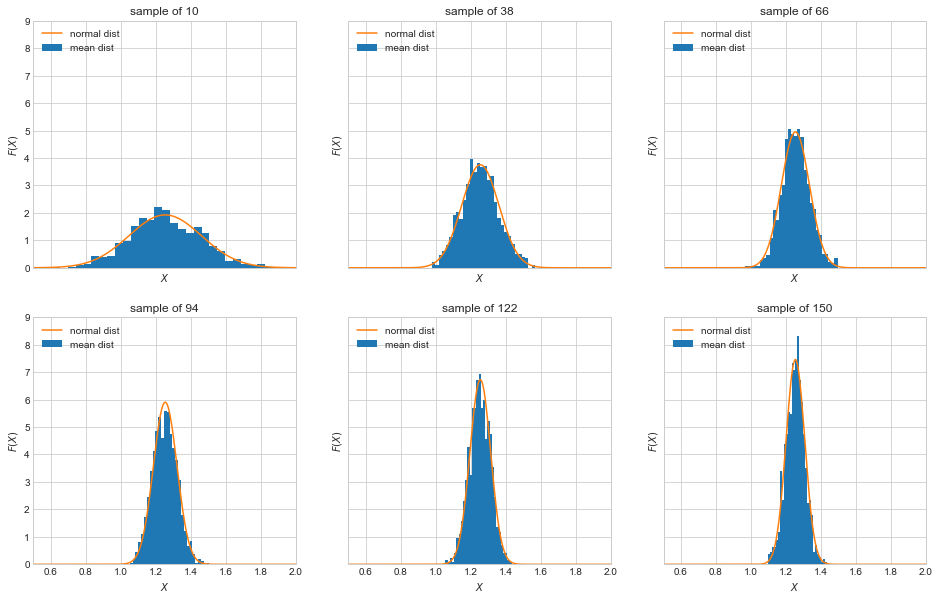

In [552]:
list_number = 0

fig, ax = plt.subplots(2, 3, sharex="col", sharey="row", figsize=(16,10))
for row in range(2):
    for col in range(3):
        ax[row, col].hist(list_of_mean[list_number], density = True, bins = 30, label = "mean dist") 
        ax[row, col].set(xlabel="$X$", ylabel="$F(X)$", xlim = (0.5, 2) , ylim = (0, 9), title = "sample of {}".format(int(sample_size[list_number])))
        
#       Считаем pdf для нормального распределения по цпт
        norm_rv = sts.norm(mean, np.sqrt(var / sample_size[list_number]))
        x = np.linspace(0.5, 2, 1000)
        pdf = norm_rv.pdf(x)
        ax[row, col].plot(x, pdf, label = "normal dist")
        ax[row, col].legend(loc = "upper left")
        
        list_number += 1

### Выводы

Как можно увидеть из гистограмм, при увеличении выборок, распределение выборочных средних становиться все более сконцентрированным вокруг среднего(выборочных средних), уменьшается дисперсия. У теоретического распределения плотности так же уменьшается дисперсия. Следовательно, точность аппроксимации так же увеличивается. 